# <span style="color:#54B1FF">Exploring Data:</span> &nbsp; <span style="color:#1B3EA9"><b>Full Script</b></span>

<br>

Scripts are text files which contain executable commands. A Python script is saved with the extension `.py`. When programs become complex, it can become more convenient to store them in a script, rather than typing all commands in a Jupyter notebook.

In the folder in which this notebook is saved, you will find a script called `full_script.py`. This file is a Python script that implements the key features from other sections of this Lesson.

Python scripts can be executed from a Jupyter notebook using the `%run` command, like this:

<br>

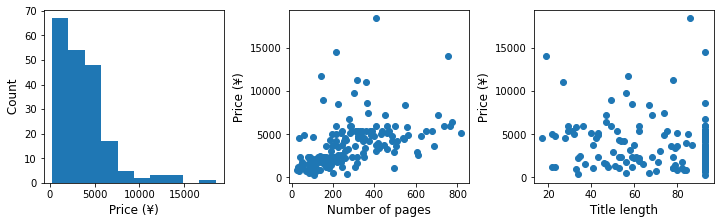

In [1]:
%run full_script.py

<br>

The figure above was generated by the `full_script.py` script. The scripts output (a figure) is automatically embedded in this notebook.

Below the script is copied to emphasize the following points:
* **Notebook management**: notebooks can be easier to read if long and/or complex code is saved in scripts, rather than in the notebook itself.
* **Result equivalance**: note that running the commands in a notebook cell produces equivalt output to using the `%run` command with an external script.

<br>

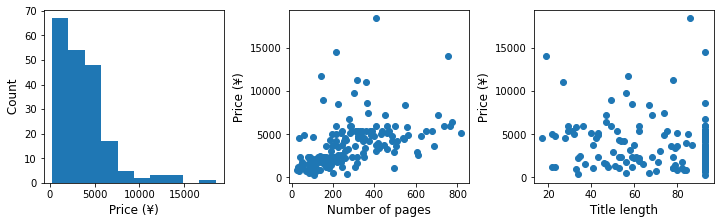

In [2]:

import os
import lxml.html
import numpy as np
from matplotlib import pyplot as plt



def parse_page(fnameHTML):
    tree      = lxml.html.parse(fnameHTML)
    body      = tree.find('body')
    # nodes       = tree.xpath("//div[@class='itemCatWrap']")
    nodes     = body.find_class('itemCatWrap')
    title     = []
    price     = []
    page      = []
    for node in nodes:
        # parse title:
        s     = node.find_class('name')[0].text
        title.append( s )
        # parse price:
        s     = node.find_class('itemCatPrice')[0].text
        s     = s[1:].replace(',', '')
        price.append( int(s) )
        # parse number of pages:
        s     = node.find_class('itemCatsetsumei')[0].text
        if 'ページ' in s:
            s = s.split(':')[1].split(',')[0]
            page.append( int(s) )
        else:
            page.append( -1 )
    return title, price, page





#(1) Parse all pages:
dir0             = os.path.abspath('')              # directory in which this PY file is saved
dirLesson        = os.path.dirname( dir0 )          # Lesson directory
dirData          = os.path.join(dirLesson, 'Data')  # Data directory
title,price,page = [], [], []
for i in [1, 2, 3, 4, 5]:
    fnameHTML    = os.path.join( dirData, f'page{i}.html' )
    t,pr,pa      = parse_page(fnameHTML)
    title       += t
    price       += pr
    page        += pa
title,price,page = np.asarray( title ), np.asarray( price ), np.asarray( page )
title_length     = np.array( [len(s) for s in title] )






#(2) Plot results:
plt.close('all')
# create figure:
fig    = plt.figure(figsize=(10,3))
# create axes:
axx    = np.linspace(0.06, 0.74, 3)
axy    = 0.18
axw    = 0.25
axh    = 0.8
ax0    = plt.axes([axx[0], axy, axw, axh])
ax1    = plt.axes([axx[1], axy, axw, axh])
ax2    = plt.axes([axx[2], axy, axw, axh])
# histogram:
ax0.hist( price )
ax0.set_xlabel(' Price (¥) ', size=12)
ax0.set_ylabel(' Count ', size=12)
# relation between number of pages and price:
i  = page > 0
ax1.scatter(page[i], price[i])
ax1.set_xlabel(' Number of pages ', size=12)
ax1.set_ylabel(' Price (¥) ', size=12)
# relation between title length and price:
ax2.scatter(title_length[i], price[i])
ax2.set_xlabel(' Title length ', size=12)
ax2.set_ylabel(' Price (¥) ', size=12)
plt.show()

